# Projeto Final - Análise de Dados do Campeonato Brasileiro 2023

### Participantes:
- Renan Alves Zago
- Ronan Antonio Pereira Junior

## Determinação do Conjunto de Dados
### Link da base de dados: 
https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol 

### Descrição geral da base
A base de dados utilizada consiste nos dados do Campeonato Brasileiro de 2003 a 2023, possui 8405 linhas e 15 atributos, sendo eles:

- Rodada: etapa que o campeonato se encontra (de 1-38)
- Data: data da realização do jogo, no formato DD/MM/AAAA
- Hora: hora da realização do jogo, no formato 24h
- Mandante: time que está jogando na sua própria arena
- Visitante: time que está jogando na arena do adversário
- Formação Mandante: esquema tático do mandante
- Formação Visitante: esquema tático do visitante
- Técnico Mandante: nome do técnico mandante
- Técnico Visitante: nome do técnico visitante
- Vencedor: time que mais fez gols na partida, se o número de gols for igual, então não existe vencedor, o jogo é considerado empatado.
- Arena: nome do estádio que aconteceu a partida
- Mandante Placar: número de gols do mandante
- Visitante Placar: número de gols do visitante
- Mandante Estado: sigla do estado do mandante
- Visitante Estado: sigla do estado do visitante


# Análise Introdutória
Conhecendo o dataset...

In [1]:
# Importando biblioteca
import pandas as pd

# Importando conjunto de dados
dfBrasileirao = pd.read_csv("campeonato-brasileiro-full.csv", usecols=lambda column: column != 'ID') # Tirando a coluna ID pra evitar repetição na visualizaçaõ

In [2]:
# Visualizando as primeiras linhas do dataset
dfBrasileirao.head()

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [3]:
# Visualizando as últimas linhas do dataset
dfBrasileirao.tail()

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
8400,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ
8404,38,06/12/2023,21:32,Vasco,Bragantino,4-4-2,4-3-3,R. Díaz,P. Faria Caixinha,Vasco,Estádio São Januário,2,1,RJ,SP


In [4]:
# Descobrindo número de linhas e colunas 
numLinhas, numColunas = dfBrasileirao.shape
print(f"Número de linhas: {numLinhas}")
print(f"Número de colunas: {numColunas}")

Número de linhas: 8405
Número de colunas: 15


In [5]:
# Visualizando informações do dataset
dfBrasileirao.info()
dfBrasileirao.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rodata              8405 non-null   int64 
 1   data                8405 non-null   object
 2   hora                8405 non-null   object
 3   mandante            8405 non-null   object
 4   visitante           8405 non-null   object
 5   formacao_mandante   3431 non-null   object
 6   formacao_visitante  3431 non-null   object
 7   tecnico_mandante    3795 non-null   object
 8   tecnico_visitante   3795 non-null   object
 9   vencedor            8405 non-null   object
 10  arena               8405 non-null   object
 11  mandante_Placar     8405 non-null   int64 
 12  visitante_Placar    8405 non-null   int64 
 13  mandante_Estado     8405 non-null   object
 14  visitante_Estado    8405 non-null   object
dtypes: int64(3), object(12)
memory usage: 985.1+ KB


,rodata,mandante_Placar,visitante_Placar
count,8405.000000,8405.000000,8405.000000
mean,20.133254,1.541225,1.027008
std,11.444643,1.230607,1.027170
min,1.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000
50%,20.000000,1.000000,1.000000
75%,30.000000,2.000000,2.000000
max,46.000000,7.000000,7.000000


Observando as informações acima, é possivel notar que os atributos "Formacao Mandante", "Formacao Visitante", "Tecnico Mandante" e "Tecnico Visitante" tem um deficit de dados, possuem quantidade significativa dos dados nulos.

# Formatando Aparência dos dadaos 

In [6]:
# Formatando a 1° letra pra maiúscula
dfBrasileirao.columns = dfBrasileirao.columns.str.title()

# Substituindo "_" por espaço 
dfBrasileirao.columns = dfBrasileirao.columns.str.replace('_', ' ')

dfBrasileirao.columns = dfBrasileirao.columns.str.replace('Rodata', 'Rodada')

# Visualizando as primeiras linhas do dataset
dfBrasileirao.head()

,Rodada,Data,Hora,Mandante,Visitante,Formacao Mandante,Formacao Visitante,Tecnico Mandante,Tecnico Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Mandante Estado,Visitante Estado
0,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


# Filtrando Ano Alvo da Análise (2023)
Decidimos escolher o ano de 2023 para fazer a análise, por ser o mais recente e por ter sido um campeonato atípico em alguns aspectos.

In [7]:
# Convertendo a coluna 'Data' para o tipo datetime
dfBrasileirao['Data'] = pd.to_datetime(dfBrasileirao['Data'], format='%d/%m/%Y')

# Filtrando as datas a partir de 2023
filter_data = dfBrasileirao['Data'] >= '2023-01-01'
brasileirao2023 = dfBrasileirao[filter_data]

brasileirao2023.head()


,Rodada,Data,Hora,Mandante,Visitante,Formacao Mandante,Formacao Visitante,Tecnico Mandante,Tecnico Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Mandante Estado,Visitante Estado
8025,1,2023-04-15,16:01,Palmeiras,Cuiaba,4-2-3-1,4-2-3-1,A. Moreira Ferreira,I. Abreu Vieira,Palmeiras,Allianz Parque,2,1,SP,MT
8026,1,2023-04-15,16:02,America-MG,Fluminense,4-2-3-1,4-2-2-2,V. Carmo Mancini,F. Diniz Silva,Fluminense,Estádio Raimundo Sampaio,0,3,MG,RJ
8027,1,2023-04-15,18:31,Bragantino,Bahia,4-2-3-1,3-4-3,P. Faria Caixinha,R. Alves Paiva,Bragantino,Nabizão,2,1,SP,BA
8028,1,2023-04-15,18:31,Athletico-PR,Goias,4-2-3-1,4-2-3-1,P. Turra,E. Rodrigues de Ávila,Athletico-PR,Ligga Arena,2,0,PR,GO
8029,1,2023-04-15,18:32,Fortaleza,Internacional,4-2-2-2,4-2-3-1,J. Vojvoda,L. Venker de Menezes,-,Arena Castelão,1,1,CE,RS


## Tabela Brasileirão

In [8]:
# Inicializando um dicionário para armazenar as estatísticas de cada time
estatisticas_times = {'Time': [], 'Pontos': [], 'Vitórias': [], 'Empates': [], 'Derrotas': [], 'Gols Marcados': [], 'Gols Sofridos': [], 'Saldo de Gols': []}

# Obtendo a lista única de times no DataFrame
times = pd.concat([brasileirao2023['Mandante'], brasileirao2023['Visitante']]).unique()

# Iterando sobre cada time para calcular as estatísticas
for time in times:
    # Filtrando partidas em que o time foi mandante ou visitante
    partidas_time = brasileirao2023[(brasileirao2023['Mandante'] == time) | (brasileirao2023['Visitante'] == time)]
    
    # Calculando estatísticas
    vitorias = partidas_time[partidas_time['Vencedor'] == time].shape[0]
    empates = partidas_time[partidas_time['Vencedor'] == '-'].shape[0]
    derrotas = partidas_time.shape[0] - vitorias - empates
    gols_marcados = partidas_time[partidas_time['Mandante'] == time]['Mandante Placar'].sum() + partidas_time[partidas_time['Visitante']== time]['Visitante Placar'].sum()
    gols_sofridos = partidas_time[partidas_time['Mandante'] == time]['Visitante Placar'].sum() + partidas_time[partidas_time['Visitante'] == time]['Mandante Placar'].sum()
    saldo_gols = gols_marcados - gols_sofridos
    pontos = vitorias * 3 + empates
    
    # Adicionando estatísticas ao dicionário
    estatisticas_times['Time'].append(time)
    estatisticas_times['Pontos'].append(pontos)
    estatisticas_times['Vitórias'].append(vitorias)
    estatisticas_times['Empates'].append(empates)
    estatisticas_times['Derrotas'].append(derrotas)
    estatisticas_times['Gols Marcados'].append(gols_marcados)
    estatisticas_times['Gols Sofridos'].append(gols_sofridos)
    estatisticas_times['Saldo de Gols'].append(saldo_gols)
    

# Criando um DataFrame com as estatísticas
tabela_simplificada = pd.DataFrame(estatisticas_times)

# Ordenando a tabela pelo número de pontos em ordem decrescente
tabela_simplificada = tabela_simplificada.sort_values(by='Pontos', ascending=False)

# Exibindo a tabela
tabela_simplificada

,Time,Pontos,Vitórias,Empates,Derrotas,Gols Marcados,Gols Sofridos,Saldo de Gols
0,Palmeiras,70,20,10,8,64,33,31
9,Gremio,68,21,5,12,63,56,7
6,Atletico-MG,66,19,9,10,52,32,20
7,Flamengo,66,19,9,10,56,42,14
5,Botafogo-RJ,64,18,10,10,58,37,21
2,Bragantino,62,17,11,10,49,35,14
10,Fluminense,56,16,8,14,51,47,4
3,Athletico-PR,56,14,14,10,51,43,8
14,Internacional,55,15,10,13,46,45,1
4,Fortaleza,54,15,9,14,45,44,1


## Quais são alguns valores típicos do conjunto de dados, como mínimo e máximo?

In [9]:
tabela_simplificada.describe()

,Pontos,Vitórias,Empates,Derrotas,Gols Marcados,Gols Sofridos,Saldo de Gols
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.0000
mean,52.100000,14.100000,9.80000,14.100000,47.300000,47.300000,0.0000
std,12.460041,4.216509,2.35305,4.459172,8.411145,13.334167,17.6337
min,24.000000,5.000000,5.00000,8.000000,35.000000,32.000000,-39.0000
25%,44.750000,11.750000,9.00000,10.000000,40.750000,37.750000,-4.7500
50%,53.500000,14.000000,9.50000,13.000000,46.500000,44.500000,1.5000
75%,62.500000,17.250000,11.00000,17.000000,51.250000,53.000000,9.5000
max,70.000000,21.000000,14.00000,24.000000,64.000000,81.000000,31.0000


# Preparação dos dados
## Manipulação de possíveis atributos faltantes

In [10]:
# Contando o número de valores ausentes por linha (todos)
num_linhas_com_ausentes = dfBrasileirao.isnull().sum(axis=1)

# Filtrando apenas as linhas que contêm pelo menos um valor ausente
linhas_com_ausentes = num_linhas_com_ausentes[num_linhas_com_ausentes > 0]

# Exibindo a contagem total de linhas com valores ausentes
total_linhas_com_ausentes = len(linhas_com_ausentes)
print(f'Total de linhas com valores ausentes: {total_linhas_com_ausentes}')


Total de linhas com valores ausentes: 4977


In [11]:
# Contando o número de valores ausentes por linha (2023)
num_linhas_com_ausentes = brasileirao2023.isnull().sum(axis=1)

linhas_com_ausentes = num_linhas_com_ausentes[num_linhas_com_ausentes > 0]

total_linhas_com_ausentes = len(linhas_com_ausentes)
print(f'Total de linhas com valores ausentes: {total_linhas_com_ausentes}')


Total de linhas com valores ausentes: 0


Podemos notar que não existem valores nulos no ano que nós vamos usar, porém, para exemplificar, vamos manipular os valores nulos que existem no dataset de algumas maneiras possíveis.

In [12]:
# Removendo a linha com valores nulos
dfBrasileiraoLinhasApagadas = dfBrasileirao.dropna()

# Mostrando n° linhas com valores ausentes após a remoção
num_linhas_com_ausentes = dfBrasileiraoLinhasApagadas.isnull().sum(axis=1)
linhas_com_ausentes = num_linhas_com_ausentes[num_linhas_com_ausentes > 0]
total_linhas_com_ausentes = len(linhas_com_ausentes)
print(f'Total de linhas com valores ausentes: {total_linhas_com_ausentes}')

# colocar outras formas de lidar com dados nulos


Total de linhas com valores ausentes: 0


## Discretização (Craindo intervalos para os dados)

In [13]:
# Criando uma cópia do DataFrame para evitar o SettingWithCopyWarning
brasileirao2023 = brasileirao2023.copy()

# Discretizando a coluna 'Mandante Placar'
bins_placar = [-1, 0, 1, 3, 5, float('inf')]
labels_placar = ['0', '1', '2-3', '4-5', '6+']
brasileirao2023['Discretizacao Placar'] = pd.cut(brasileirao2023['Mandante Placar'], bins=bins_placar, labels=labels_placar, include_lowest=True)

print(brasileirao2023[['Mandante Placar', 'Discretizacao Placar']].head())


      Mandante Placar Discretizacao Placar
8025                2                  2-3
8026                0                    0
8027                2                  2-3
8028                2                  2-3
8029                1                    1


## Outliers 
Existem valores atípicos ou discrepantes (outliers) no conjunto de dados?
Vamos analisar os placares.

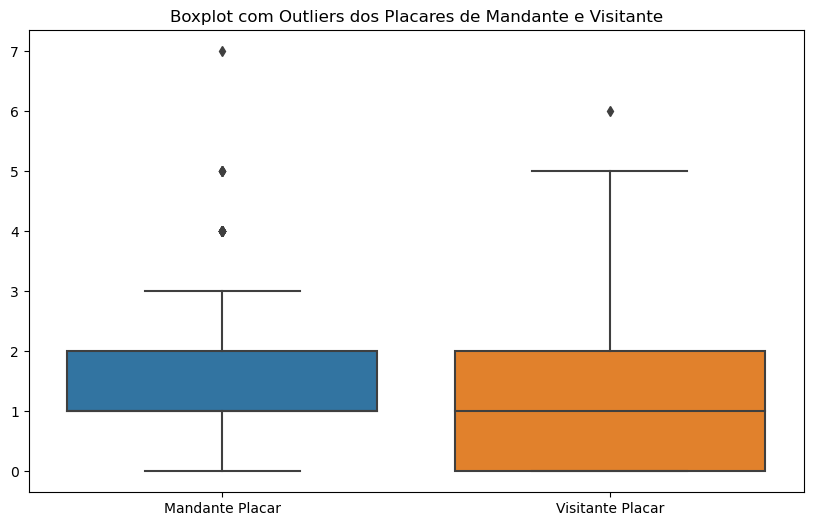

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um DataFrame apenas com as colunas relevantes
data = brasileirao2023[['Mandante Placar', 'Visitante Placar']]

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, showfliers=True)
plt.title('Boxplot com Outliers dos Placares de Mandante e Visitante')
plt.show()

Observando o bloxplot, notamos que nos dados dos placares existem sim alguns outliers, porém, os resultados se concentram entre 0 - 2 gols.

# Perguntas Sobre o Dataset

### Desempenho dos Times:
- Quais times têm o melhor desempenho geral? E os piores?
- Quais times mais e menos fizeram gols?

In [15]:
# Removendo as linhas correspondentes a empates
brasileirao2023_sem_empates = brasileirao2023[brasileirao2023['Vencedor'] != '-']

# Contando o número de vitórias para cada time
vitorias_por_time = brasileirao2023_sem_empates['Vencedor'].value_counts()

# Exibindo os três times mais vitoriosos
times_mais_vitoriosos = vitorias_por_time.head(5)

print("Times mais vitoriosos:")
print(times_mais_vitoriosos)

Times mais vitoriosos:
Gremio         21
Palmeiras      20
Atletico-MG    19
Flamengo       19
Botafogo-RJ    18
Name: Vencedor, dtype: int64


5 times com mais vitórias são: 
   - Gremio
   - Palmeiras
   - Atletico-MG
   - Flamengo
   - Botafogo-RJ

In [16]:
# Filtrando empates representados como '-'
empates = brasileirao2023[brasileirao2023['Vencedor'] == '-']

# Concatenando as séries de Mandante e Visitante e contando o número de empates para cada time
empates_por_time = pd.concat([empates['Mandante'], empates['Visitante']]).value_counts()

# Exibindo os três times que mais empataram
times_mais_empataram = empates_por_time.nlargest(5)

print("Os três times que mais empataram:")
print(times_mais_empataram)

Os três times que mais empataram:
Cruzeiro        14
Athletico-PR    14
Corinthians     14
Sao Paulo       11
Bragantino      11
dtype: int64


5 times com mais empates:
   - Cruzeiro        
   - Athletico-PR    
   - Corinthians     
   - Sao Paulo       
   - Bragantino      

In [17]:
# Obtendo os times que perderam como mandantes
times_derrotados_mandante = brasileirao2023_sem_empates[brasileirao2023_sem_empates['Vencedor'] == brasileirao2023_sem_empates['Visitante']]['Mandante']

# Obtendo os times que perderam como visitantes
times_derrotados_visitante = brasileirao2023_sem_empates[brasileirao2023_sem_empates['Vencedor'] == brasileirao2023_sem_empates['Mandante']]['Visitante']

# Concatenando as séries de times derrotados como mandantes e visitantes
times_derrotados = pd.concat([times_derrotados_mandante, times_derrotados_visitante])

# Contando o número de derrotas para cada time
derrotas_por_time = times_derrotados.value_counts()

# Exibindo os cinco times mais derrotados
times_mais_derrotados = derrotas_por_time.head(5)

print("Times mais derrotados:")
print(times_mais_derrotados)


Times mais derrotados:
America-MG    24
Coritiba      24
Goias         18
Bahia         18
Santos        17
dtype: int64


5 times com mais derrotas:
   - America-MG
   - Coritiba
   - Goias
   - Bahia
   - Santos

### Número de gols marcados por cada time

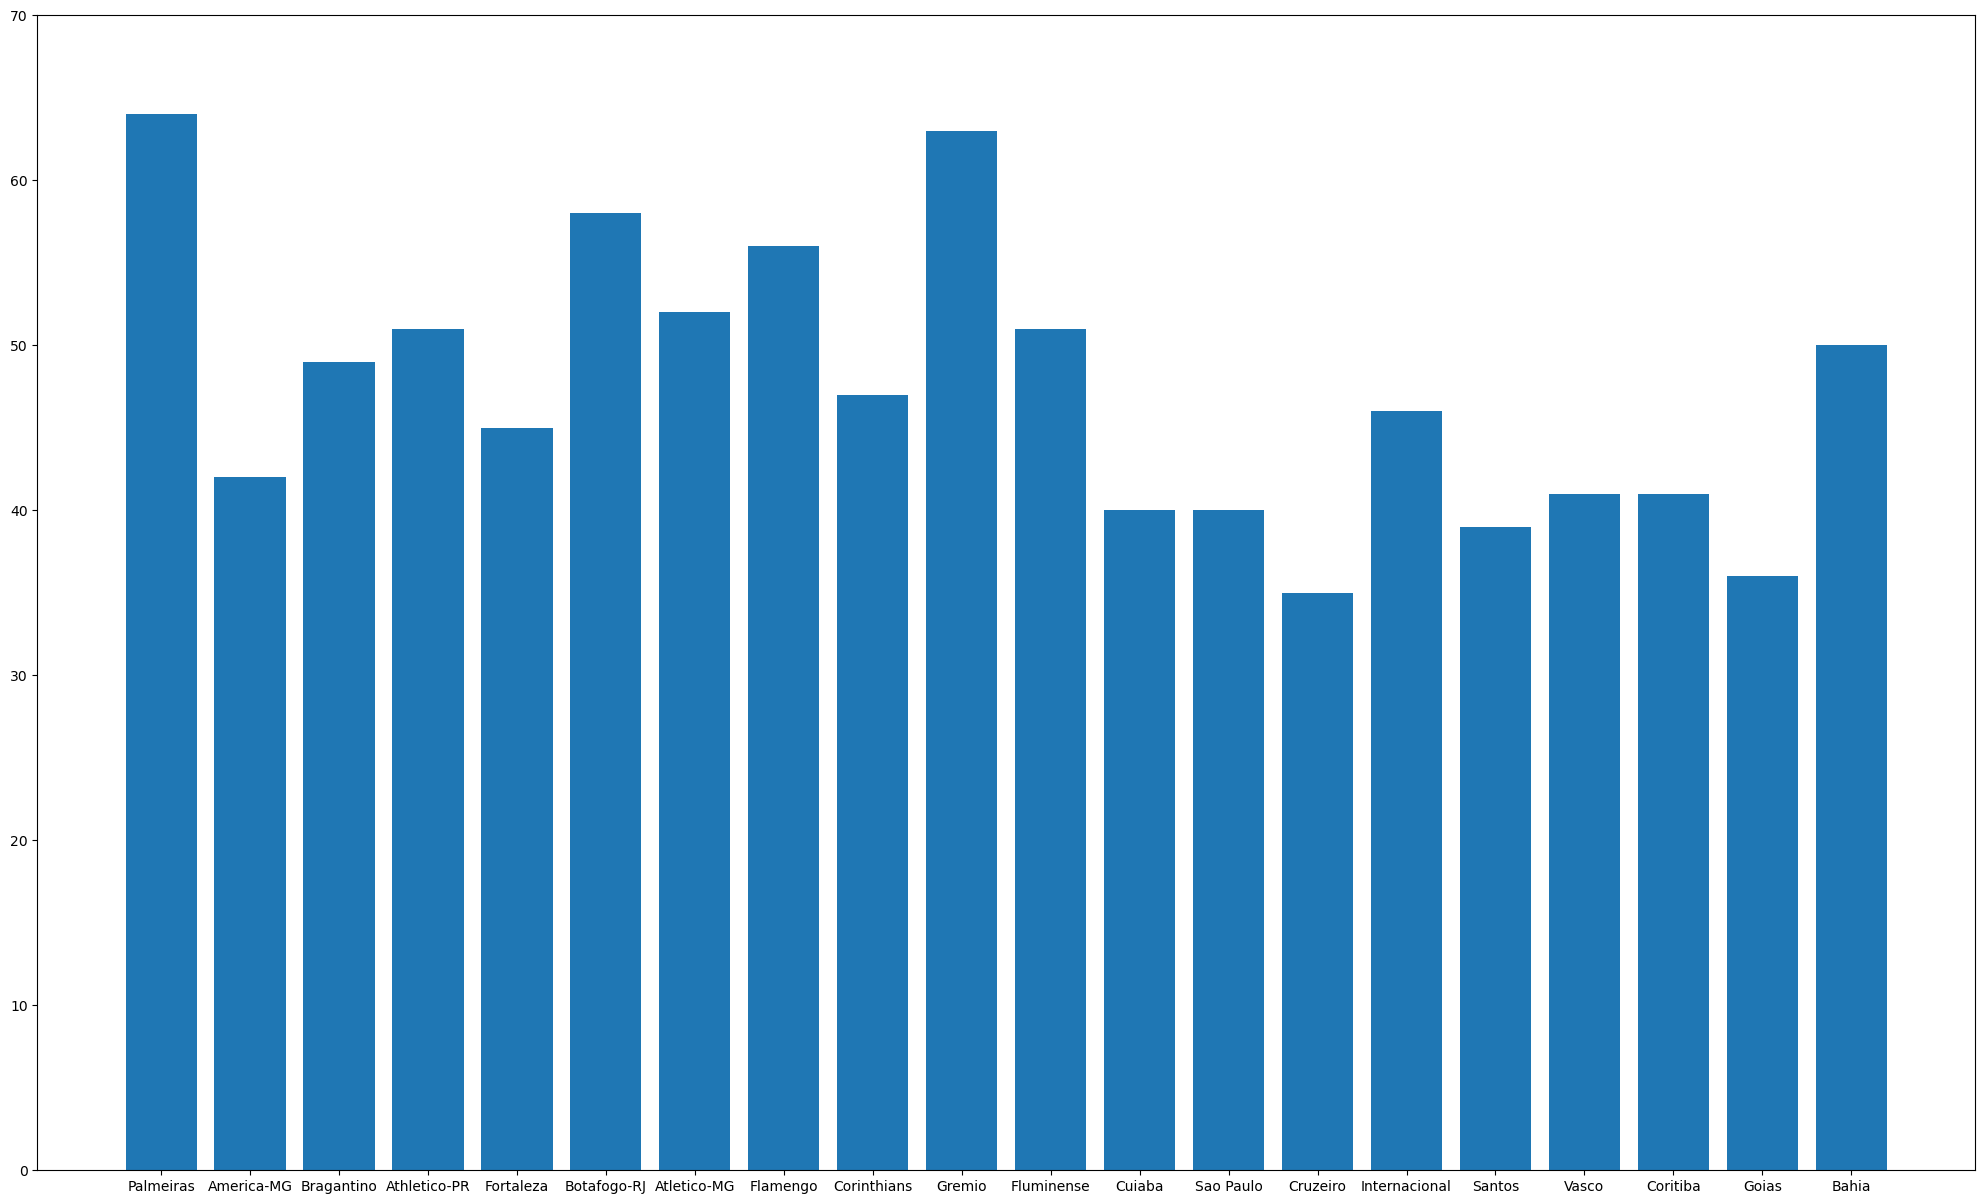

In [18]:
import matplotlib.pyplot as plt
# Plotando grafico das estatisticas de gols marcados
plt.figure(figsize=(25,15))
plt.ylim(0,70)
plt.bar(times, estatisticas_times['Gols Marcados'])
plt.xticks(ticks=times, labels=times)
plt.show()

### Número de gols sofridos por cada time

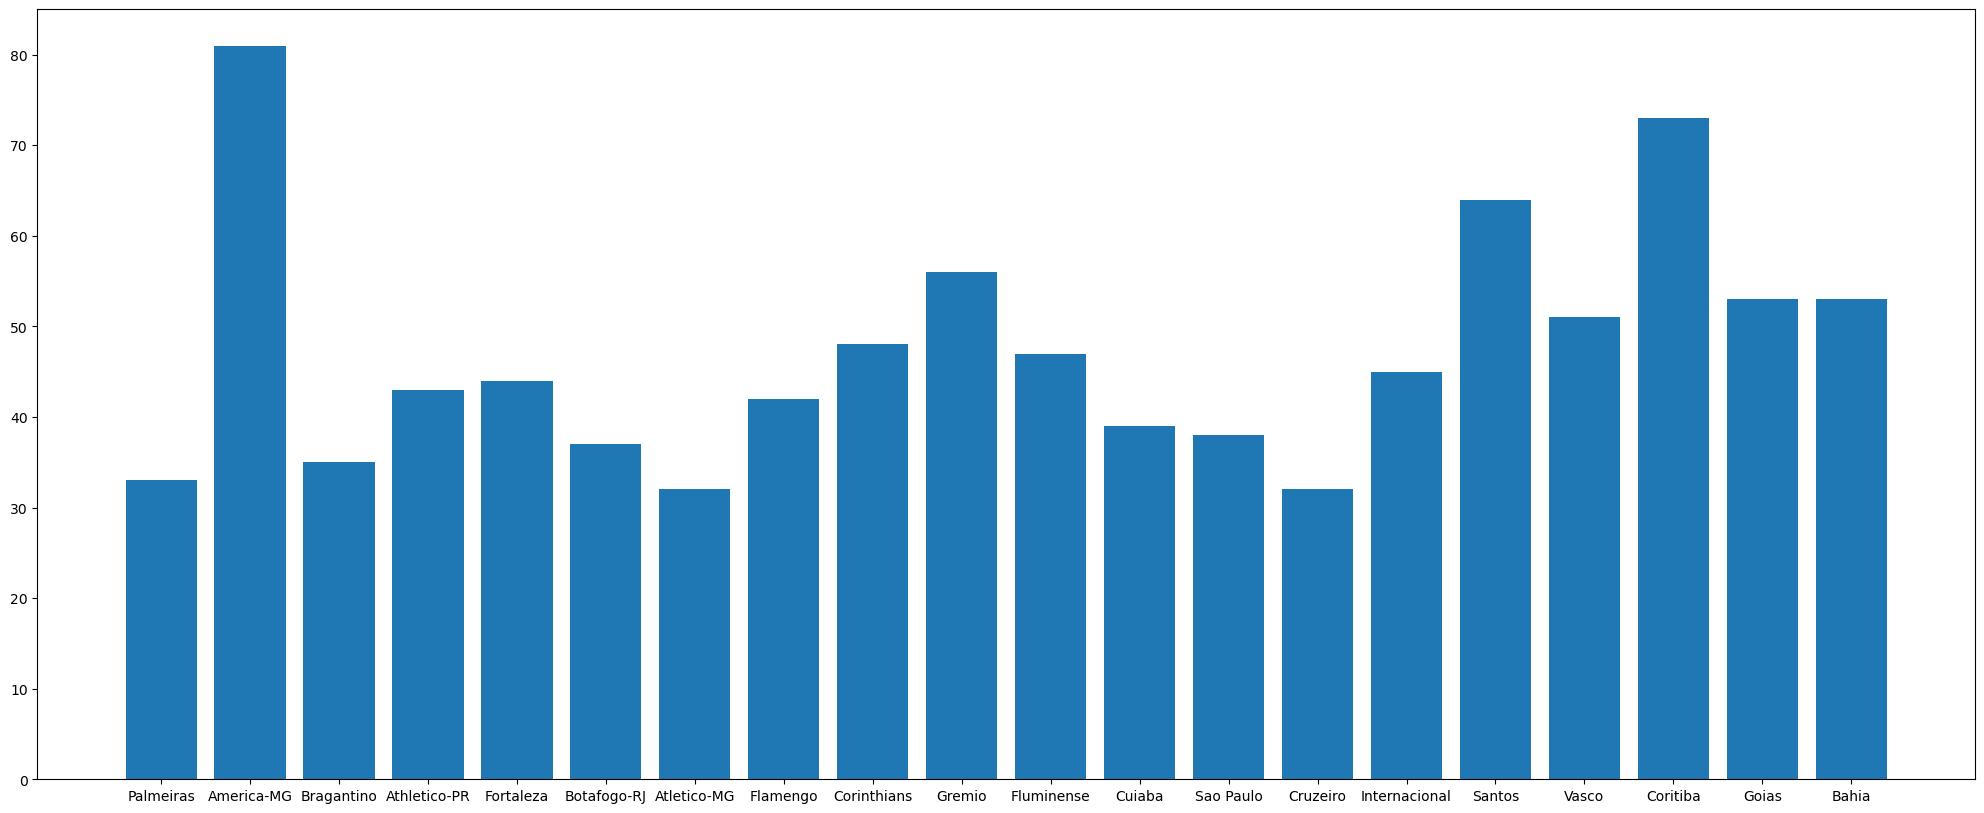

In [19]:
import matplotlib.pyplot as plt
# Plotando grafico das estatisticas de gols sofridos
plt.figure(figsize=(25,10))
plt.ylim(0,85)
plt.bar(times, estatisticas_times['Gols Sofridos'])
plt.xticks(ticks=times, labels=times)
plt.show()

### Melhores Ataques

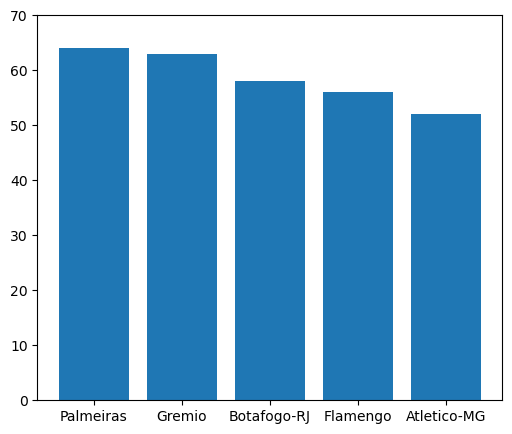

In [20]:
import matplotlib.pyplot as plt
# Separando os dados dos melhores ataques
tabela_simplificada_ataques = tabela_simplificada.sort_values(by='Gols Marcados', ascending=False)
melhores_ataques = list(tabela_simplificada_ataques['Gols Marcados'])[:5]
times_usados = list(tabela_simplificada_ataques['Time'])[:5]
# Plotando grafico das estatisticas de gols marcados
plt.figure(figsize=(6,5))
plt.ylim(0,70)
plt.bar(times_usados, melhores_ataques)
plt.xticks(ticks=times_usados, labels=times_usados)
plt.show()

### Melhores Defesas 

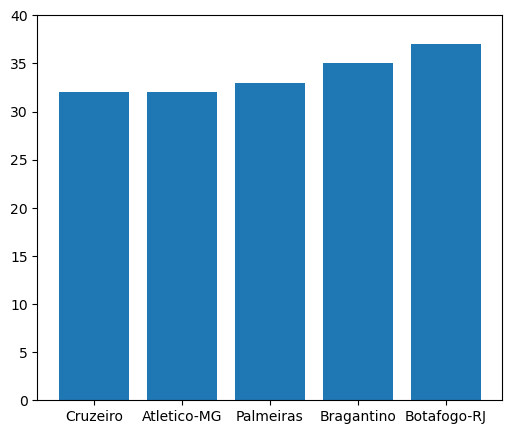

In [21]:
import matplotlib.pyplot as plt
# Separando os dados das melhores defesas
tabela_simplificada_defesas = tabela_simplificada.sort_values(by='Gols Sofridos', ascending=True)
melhores_defesas = list(tabela_simplificada_defesas['Gols Sofridos'])[:5]
times_usados = list(tabela_simplificada_defesas['Time'])[:5]

# Plotando grafico das estatisticas de gols sofridos
plt.figure(figsize=(6,5))
plt.ylim(0,40)
plt.bar(times_usados, melhores_defesas)
plt.xticks(ticks=times_usados, labels=times_usados)
plt.show()

## Distribuição Geográfica:
Como os resultados variam entre os times de diferentes estados?

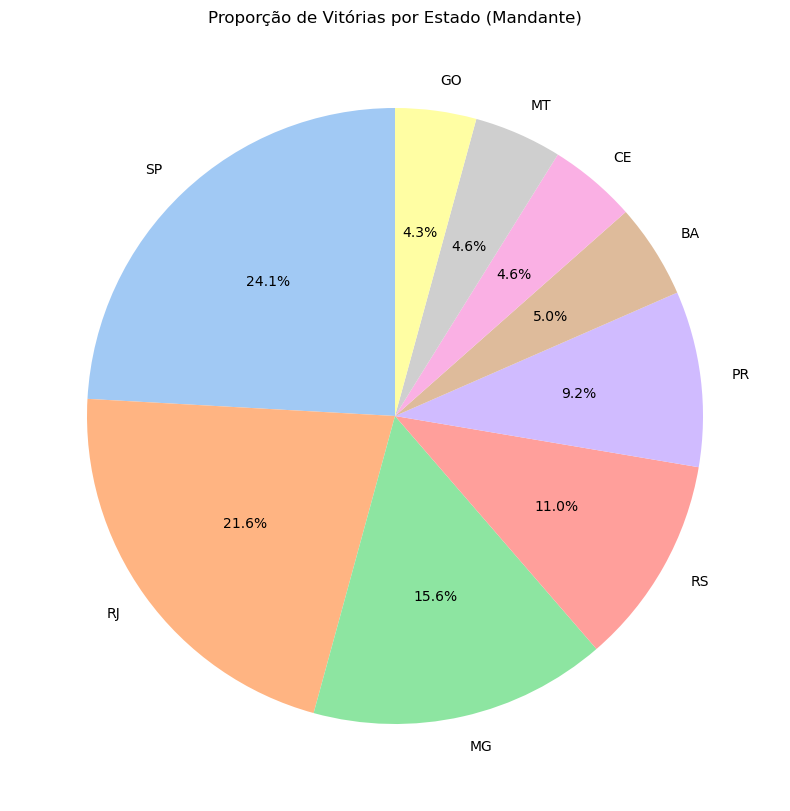

In [22]:
# Criando um DataFrame com as colunas relevantes
data_geografica_vitorias = brasileirao2023[['Mandante Estado', 'Vencedor']]

# Contando o número de vitórias para cada estado
vitorias_por_estado = data_geografica_vitorias[data_geografica_vitorias['Vencedor'] != '-']['Mandante Estado'].value_counts()

# Plotando um gráfico de pizza
plt.figure(figsize=(10, 10))
vitorias_por_estado.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proporção de Vitórias por Estado (Mandante)')
plt.ylabel('') 
plt.show()


## Desempenho em Casa e Fora:
- Quais times têm um desempenho melhor em casa? 
- E fora de casa?

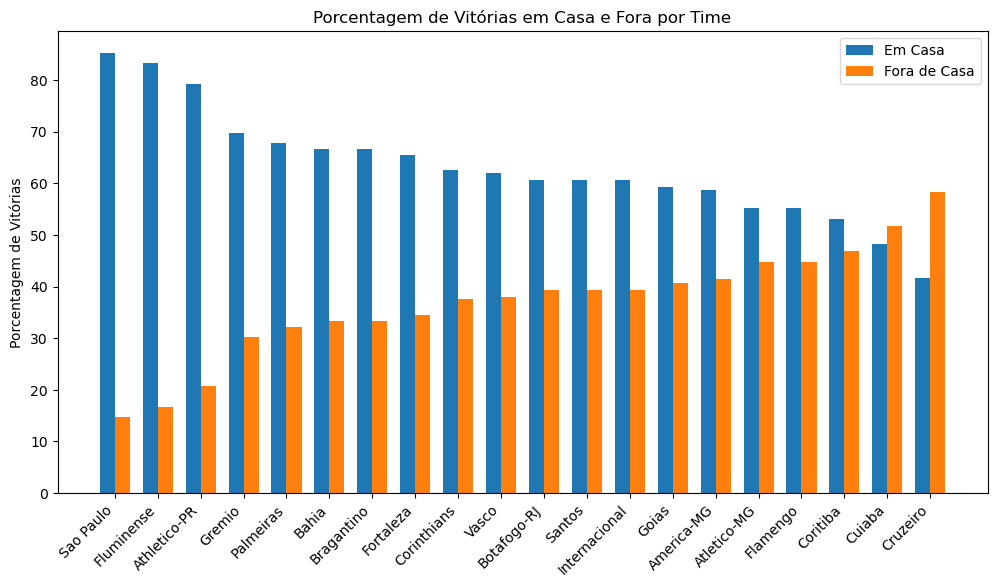

In [23]:
# Criando cópia
brasileirao2023 = brasileirao2023.copy()

# Criando uma coluna indicando se o time venceu em casa
brasileirao2023['Vitoria em Casa'] = brasileirao2023['Vencedor'] == brasileirao2023['Mandante']

# Criando uma coluna indicando se o time venceu fora de casa
brasileirao2023['Vitoria Fora Casa'] = brasileirao2023['Vencedor'] == brasileirao2023['Visitante']

# Contando o número de vitórias em casa e fora para cada time
vitorias_casa_fora = brasileirao2023.groupby('Mandante')[['Vitoria em Casa', 'Vitoria Fora Casa']].sum().fillna(0)

# Adicionando os resultados dos times visitantes
vitorias_casa_fora += brasileirao2023.groupby('Visitante')[['Vitoria em Casa', 'Vitoria Fora Casa']].sum().fillna(0)

# Calculando a porcentagem de vitórias em casa e fora para cada time
vitorias_casa_fora['Porcentagem Vitoria em Casa'] = (vitorias_casa_fora['Vitoria em Casa'] / (vitorias_casa_fora['Vitoria em Casa'] + vitorias_casa_fora['Vitoria Fora Casa'])) * 100
vitorias_casa_fora['Porcentagem Vitoria Fora Casa'] = (vitorias_casa_fora['Vitoria Fora Casa'] / (vitorias_casa_fora['Vitoria em Casa'] + vitorias_casa_fora['Vitoria Fora Casa'])) * 100

# Ordenando os times pela porcentagem de vitórias em casa
vitorias_casa_fora = vitorias_casa_fora.sort_values(by='Porcentagem Vitoria em Casa', ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar_positions = range(len(vitorias_casa_fora))

plt.bar(bar_positions, vitorias_casa_fora['Porcentagem Vitoria em Casa'], width=bar_width, label='Em Casa')
plt.bar([pos + bar_width for pos in bar_positions], vitorias_casa_fora['Porcentagem Vitoria Fora Casa'], width=bar_width, label='Fora de Casa')

plt.xticks([pos + bar_width / 2 for pos in bar_positions], vitorias_casa_fora.index, rotation=45, ha='right')
plt.title('Porcentagem de Vitórias em Casa e Fora por Time')
plt.ylabel('Porcentagem de Vitórias')
plt.legend()
plt.show()


## Formações:
- Existe uma formação que geralmente leva a melhores resultados?
- E os piores?
- E as mais utilizadas?

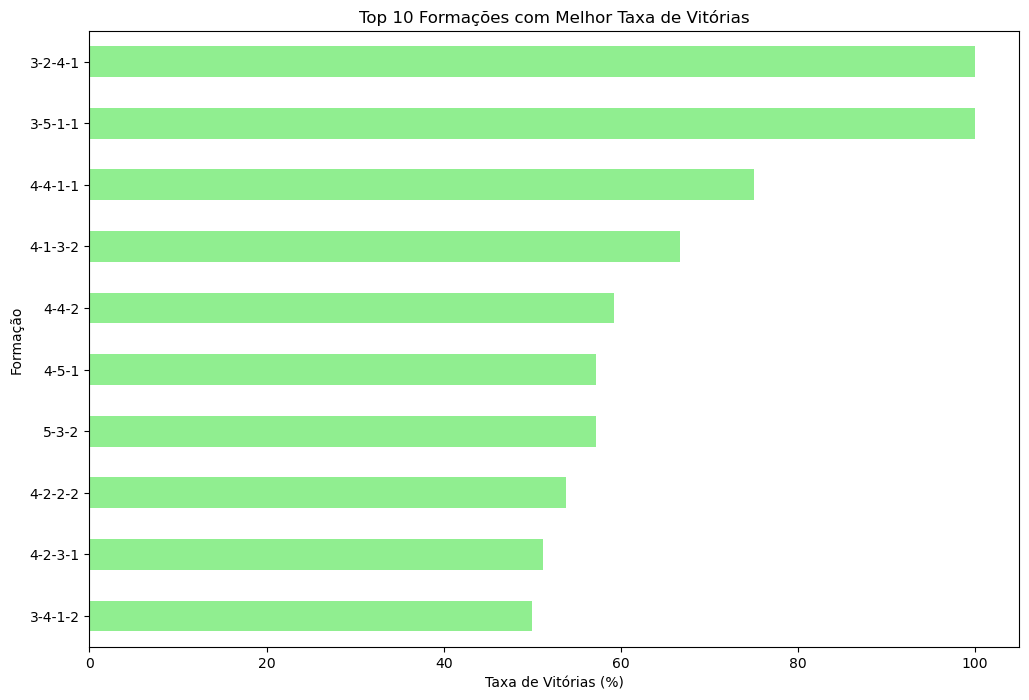

In [24]:
brasileirao2023 = brasileirao2023.copy()

# Criando uma coluna indicando se o time venceu
brasileirao2023['Vitoria'] = brasileirao2023['Vencedor'] == brasileirao2023['Mandante']

# Contando o número de vitórias para cada formação
vitorias_por_formacao_mandante = brasileirao2023.groupby('Formacao Mandante')['Vitoria'].sum().fillna(0)

# Adicionando as vitórias das formações dos times visitantes
vitorias_por_formacao_visitante = brasileirao2023.groupby('Formacao Visitante')['Vitoria'].sum().fillna(0)

# Somando as vitórias de formações mandantes e visitantes
vitorias_por_formacao = vitorias_por_formacao_mandante.add(vitorias_por_formacao_visitante, fill_value=0)

# Contando o número total de partidas para cada formação
total_partidas_por_formacao_mandante = brasileirao2023.groupby('Formacao Mandante').size().fillna(0)

# Adicionando as partidas das formações dos times visitantes
total_partidas_por_formacao_visitante = brasileirao2023.groupby('Formacao Visitante').size().fillna(0)

# Somando as partidas de formações mandantes e visitantes
total_partidas_por_formacao = total_partidas_por_formacao_mandante.add(total_partidas_por_formacao_visitante, fill_value=0)

# Calculando a taxa de vitórias para cada formação
taxa_vitorias_por_formacao = (vitorias_por_formacao / total_partidas_por_formacao) * 100

# Tratando casos em que o número total de partidas é zero para evitar divisão por zero
taxa_vitorias_por_formacao = taxa_vitorias_por_formacao.fillna(0)

# Ordenando as formações pela taxa de vitórias
formacoes_melhor_taxa_vitorias = taxa_vitorias_por_formacao.sort_values(ascending=False).head(10)

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
formacoes_melhor_taxa_vitorias.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Formações com Melhor Taxa de Vitórias')
plt.xlabel('Taxa de Vitórias (%)')
plt.ylabel('Formação')
plt.show()


O gráfico de melhor taxa de vitórias é, a primeira vista, estranho, pois formações menos utilizadas no futebol mundial aparecem com maior porcentagem de sucessos do que formações tradicionais, como a 4-3-3, que nem aparece no top 10. Curiosamente, a formação que vem sendo utilizada pelo Manchester City, atual campeão do Mundial de Clubes, o 3-2-4-1, conta com 100% de vitórias no campeonato brasileiro, havendo sido utilizada apenas pelo Redbull Bragantino em duas partidas, na goleada contra o Flamengo por 4-0 e na vitória contra o Goiás por 2-0. Essa formação é parte de uma tendência no futebol da formação de um quadrado no meio de campo, no caso da formação do City e do Bragantino, a partir da utilização dos dois volantes e dois "números dez" para conseguir superioridade numérica e controle em relação as formações mais populares atualmente, o 4-3-3 e o 4-2-3-1, ambas que contam com 3 meio campistas.

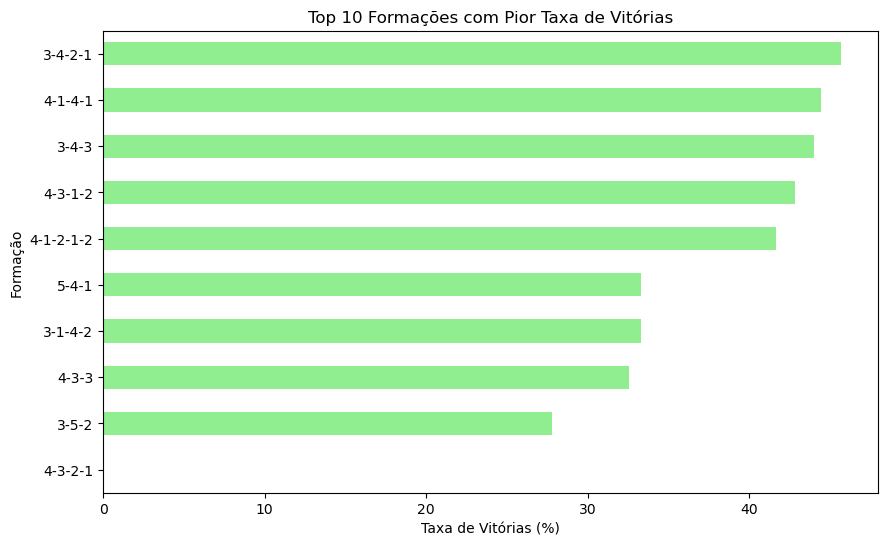

In [25]:
# Calculando a taxa de vitórias para cada formação
taxa_vitorias_por_formacao = (vitorias_por_formacao / total_partidas_por_formacao) * 100

# Ordenando as formações pelas taxas de vitórias em ordem crescente
formacoes_piores_taxa_vitorias = taxa_vitorias_por_formacao.sort_values().head(10)

plt.figure(figsize=(10, 6))
formacoes_piores_taxa_vitorias.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Formações com Pior Taxa de Vitórias')
plt.xlabel('Taxa de Vitórias (%)')
plt.ylabel('Formação')
plt.show()


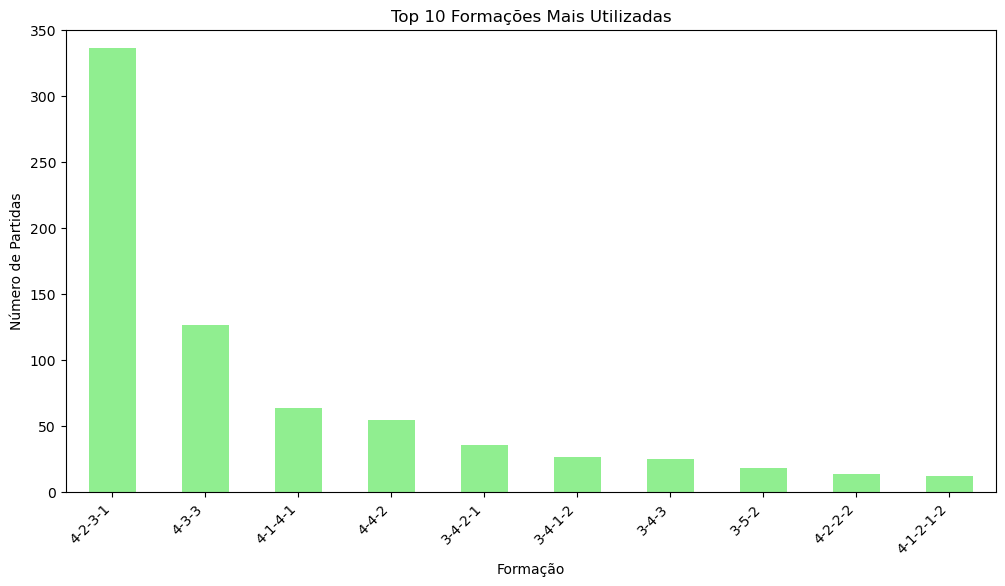

In [26]:
# Contando o número total de partidas para cada formação
total_partidas_por_formacao = pd.concat([brasileirao2023['Formacao Mandante'], brasileirao2023['Formacao Visitante']]).value_counts()

# Ordenando as formações pelo número total de partidas em ordem decrescente
formacoes_mais_utilizadas = total_partidas_por_formacao.sort_values(ascending=False).head(10)

# Plotando o gráfico de barras para as 10 formações mais utilizadas
plt.figure(figsize=(12, 6))
formacoes_mais_utilizadas.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Formações Mais Utilizadas')
plt.xlabel('Formação')
plt.ylabel('Número de Partidas')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 350) 
plt.show()


### Análise Temporal:
Algum time teve um desempenho significativamente melhor ou pior em determinado período?
Vamos analisar o botafogo!

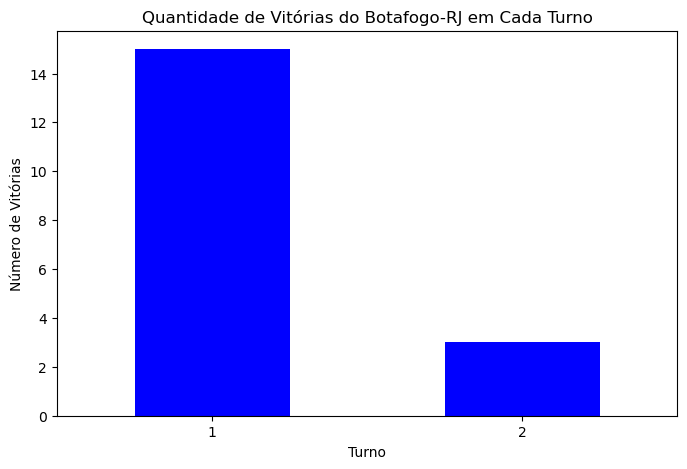

In [27]:
import matplotlib.pyplot as plt

brasileirao2023 = brasileirao2023.copy()

# Ordenando o DataFrame pelas rodadas
brasileirao2023.sort_values(by='Rodada', inplace=True)

# Dividindo as rodadas em 2 turnos
total_rodadas = brasileirao2023['Rodada'].nunique()
meio_rodadas = total_rodadas // 2

# Marcando os turnos
brasileirao2023['Turno'] = brasileirao2023['Rodada'].apply(lambda x: '1' if x <= meio_rodadas else '2')

# Criando uma coluna indicando se o Botafogo_RJ venceu em cada partida
brasileirao2023['Vitoria_Botafogo_RJ'] = brasileirao2023.apply(lambda row: row['Vencedor'] == 'Botafogo-RJ' if pd.notnull(row['Vencedor']) else False, axis=1)

# Contando o número de vitórias do Botafogo_RJ em cada turno
vitorias_por_turno = brasileirao2023.groupby('Turno')['Vitoria_Botafogo_RJ'].sum()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
vitorias_por_turno.plot(kind='bar', color='blue')
plt.title('Quantidade de Vitórias do Botafogo-RJ em Cada Turno')
plt.xlabel('Turno')
plt.ylabel('Número de Vitórias')
plt.xticks(rotation=0)
plt.show()


### Qual seria um valor para representar a posição (ou localização) central do conjunto de dados?

### Qual seria uma medida da variabilidade ou dispersão dos dados?

### Os dados podem ser considerados simétricos?